In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits = pd.read_excel (r'C:/Users/Admin/Downloads/SD03Q02/SD03Q02/fruits.xlsx')

In [202]:
fruits.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [203]:
fruits.shape
fruits.describe

<bound method NDFrame.describe of     fruit_label fruit_name  mass  width  height  color_score
0             1      apple   192    8.4     7.3         0.55
1             1      apple   180    8.0     6.8         0.59
2             1      apple   176    7.4     7.2         0.60
3             2   mandarin    86    6.2     4.7         0.80
4             2   mandarin    84    6.0     4.6         0.79
5             2   mandarin    80    5.8     4.3         0.77
6             2   mandarin    80    5.9     4.3         0.81
7             2   mandarin    76    5.8     4.0         0.81
8             1      apple   178    7.1     7.8         0.92
9             1      apple   172    7.4     7.0         0.89
10            1      apple   166    6.9     7.3         0.93
11            1      apple   172    7.1     7.6         0.92
12            1      apple   154    7.0     7.1         0.88
13            1      apple   164    7.3     7.7         0.70
14            1      apple   152    7.6     7.3    

In [204]:
fname = fruits['fruit_name'].unique()
fname
fsize = fruits.groupby('fruit_name',sort=False).size()
fsize

fruit_name
apple       19
mandarin     5
orange      19
lemon       16
dtype: int64

In [205]:
fruits.isnull().sum()

fruit_label    0
fruit_name     0
mass           0
width          0
height         0
color_score    0
dtype: int64

In [206]:
duplicate = fruits.duplicated()
print(duplicate.sum())
fruits[duplicate]

0


,fruit_label,fruit_name,mass,width,height,color_score


<IPython.core.display.Javascript object>


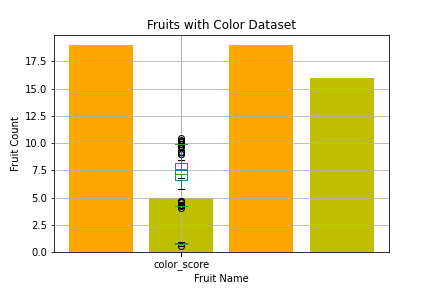

<function matplotlib.pyplot.show(*args, **kw)>

In [207]:
fruits.boxplot(column=['width'])
plt.show

In [208]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 + IQR)
    upper_range = Q3 + (1.5 + IQR)
    return lower_range,upper_range


In [209]:
lowwidth,upwidth = remove_outlier(fruits['width'])
fruits['width']=np.where(fruits['width']>upwidth,upwidth,fruits['width'])
fruits['width']=np.where(fruits['width']<lowwidth,lowwidth,fruits['width'])


In [210]:
fruits.boxplot(column=['width'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [211]:
fruits.boxplot(column=["height"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [212]:
lowheight,upheight = remove_outlier(fruits['height'])
fruits['height']=np.where(fruits['height']>upwidth,upwidth,fruits['height'])
fruits['height']=np.where(fruits['height']<lowwidth,lowwidth,fruits['height'])

In [213]:
fruits.boxplot(column=['height'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [214]:
lowmass,upmass = remove_outlier(fruits['mass'])
fruits['mass']=np.where(fruits['mass']>upwidth,upwidth,fruits['mass'])
fruits['mass']=np.where(fruits['mass']<lowwidth,lowwidth,fruits['mass'])

In [215]:
fruits.boxplot(column=['mass'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [216]:
import matplotlib.pyplot as plt
plt.bar(fname,fsize,color = ['orange','y'])
plt.xlabel('Fruit Name')
plt.ylabel('Fruit Count')
plt.title('Fruits with Color Dataset')
plt.show()

In [217]:
fruits.boxplot(column=['color_score'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [218]:
lowcolor,upcolor = remove_outlier(fruits['color_score'])
fruits['color_score']=np.where(fruits['color_score']>upwidth,upwidth,fruits['color_score'])
fruits['color_score']=np.where(fruits['color_score']<lowwidth,lowwidth,fruits['color_score'])

In [219]:
fruits.boxplot(column=['color_score'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt # for plotting and visualozing data
%matplotlib inline

fruits=pd.read_excel(r'C:/Users/Admin/Downloads/SD03Q02/SD03Q02/fruits.xlsx')

#checking first five rows of our dataset
fruits.head()

# Data Description
print(fruits.describe())

# Data Info
fruits.info()

# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

#checking how many unique fruit names are present in the dataset
fruits['fruit_name'].value_counts()

data_imputed = fruits.fillna(fruits.median())


       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color

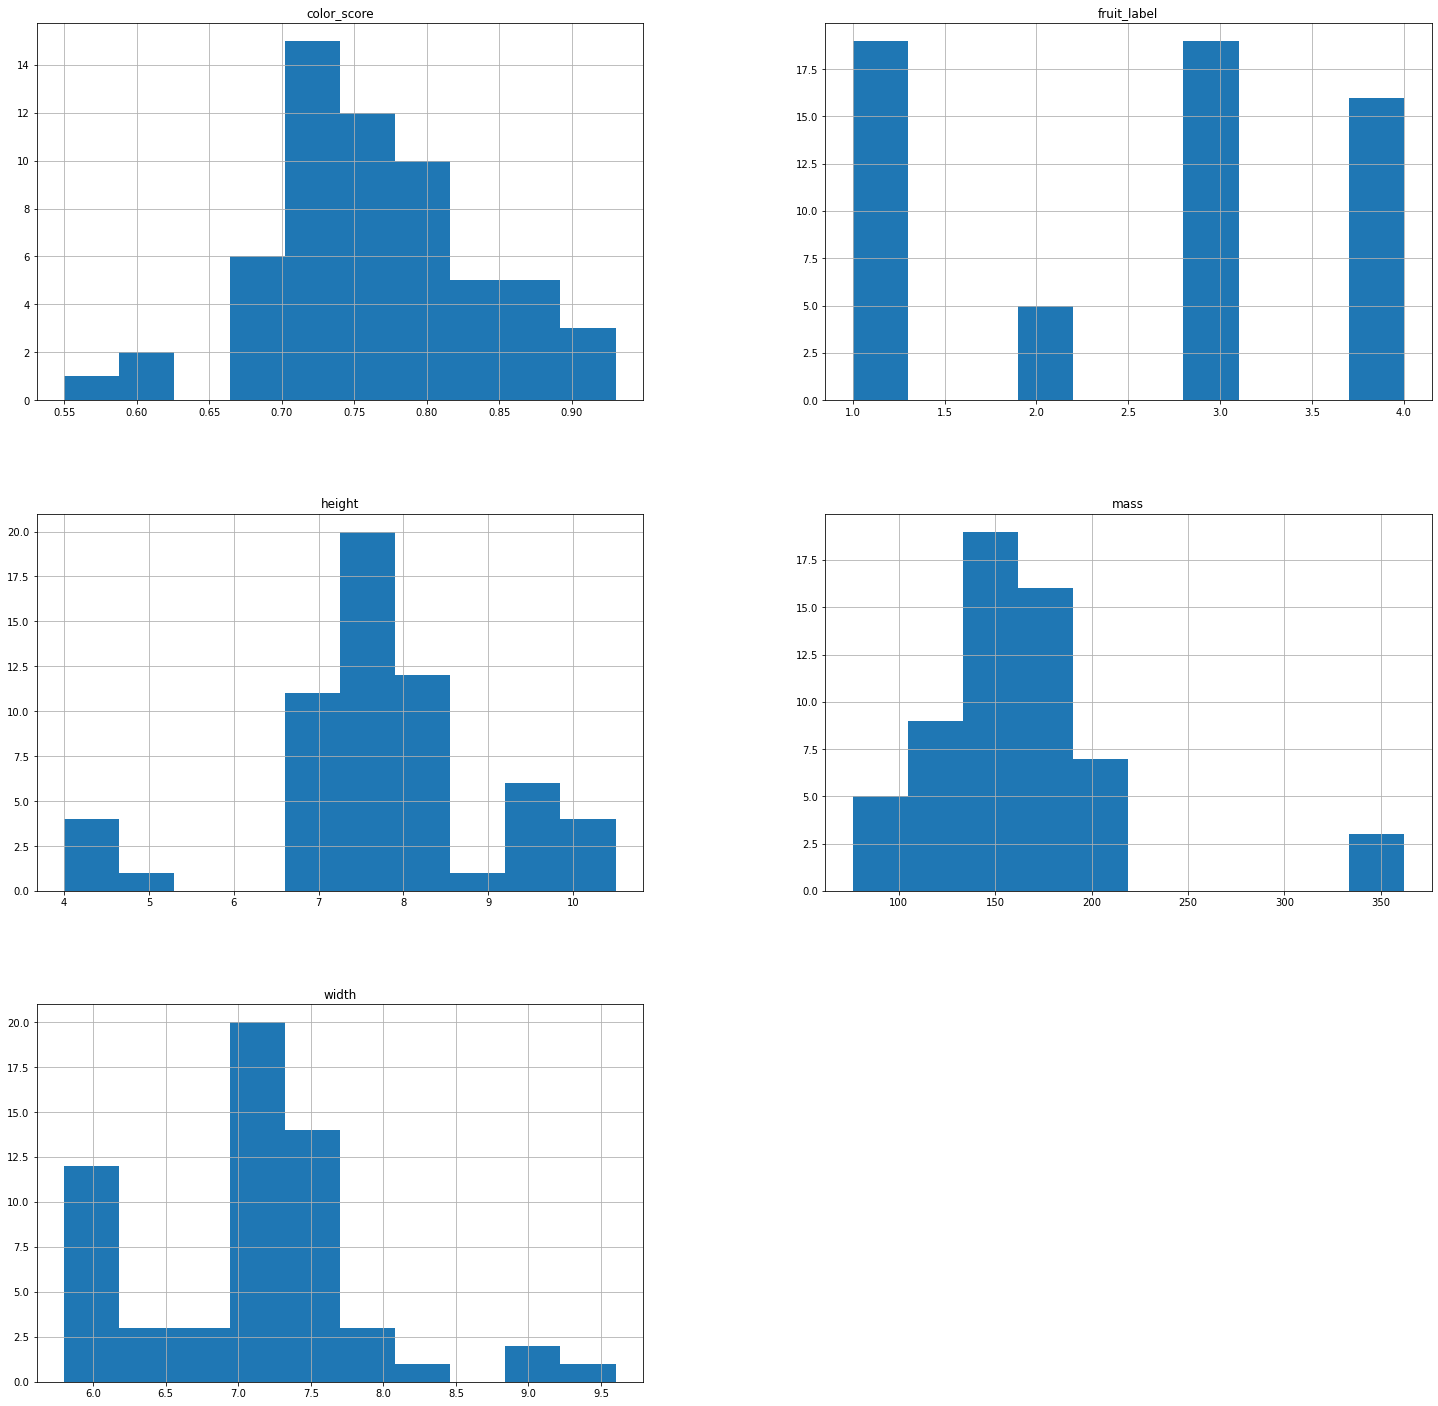

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [3]:
data_imputed.isnull().sum()

data_imputed.hist(figsize=(25,25))
plt.show()

from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler as MMS

z_scores = zscore(data_imputed.iloc[:,2:5])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_outlir = data_imputed[filtered_entries]
data_outlir.shape

scaler = MMS()
data_std = scaler.fit_transform(data_outlir.iloc[:,2:6])
data_std = pd.DataFrame(data_std)
data_std.shape

data_va = data_std.var(axis= 0)
data_vas = data_va.sort_values(ascending=False)
y = data_vas.values 
x = range(len(y))

plt.figure(figsize = (5,5))


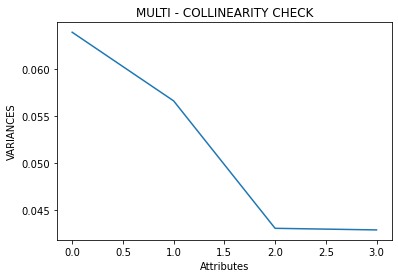

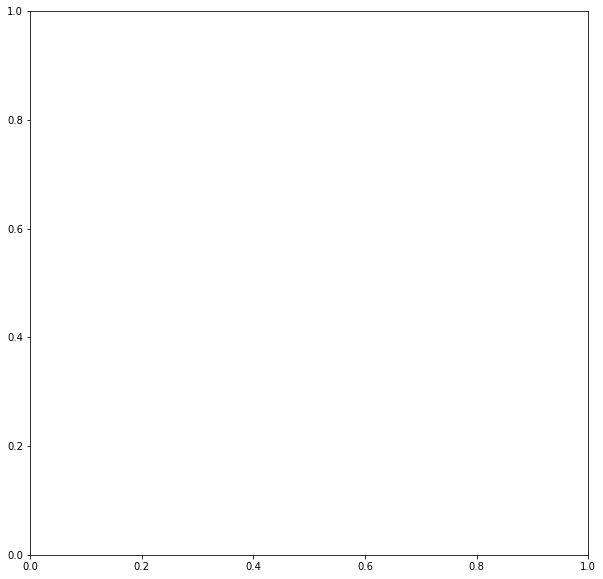

In [4]:
plt.plot(x, y)
plt.title("MULTI - COLLINEARITY CHECK")
plt.xlabel("Attributes")
plt.ylabel("VARIANCES")
plt.show()

def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if ((abs(corr_matrix.iloc[i, j]) >= threshold) or (abs(corr_matrix.iloc[i, j]) <= (-1*threshold))) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] 
    return dataset

from sklearn.preprocessing import LabelEncoder as LE

Y = data_outlir['fruit_label']

X = correlation(data_std, 0.7)
cor = X.corr()
figure, axes = plt.subplots(figsize=(10,10))


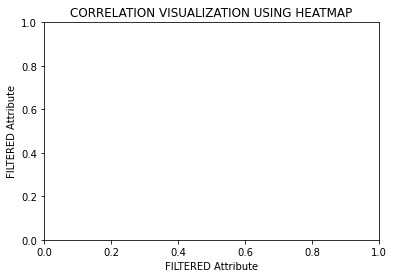

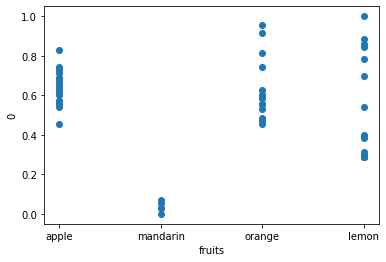

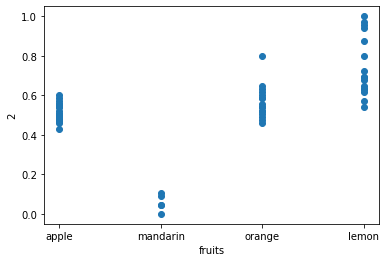

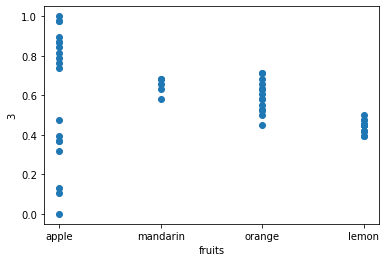

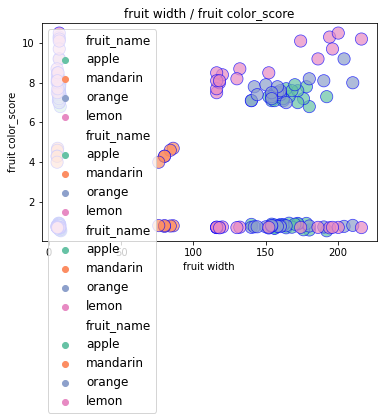

In [5]:
sns.heatmap(cor, ax = axes, cmap = "YlGnBu", linecolor = 'black')
plt.title("CORRELATION VISUALIZATION USING HEATMAP")
plt.xlabel("FILTERED Attribute")
plt.ylabel("FILTERED Attribute")
plt.show()

for i in data_std.columns:
    plt.scatter( data_outlir['fruit_name'] , data_std[i] )
    plt.xlabel('fruits')
    plt.ylabel(i)
    plt.show()

# 1.  scatter visualization

sns.scatterplot('width', 'height', data = data_outlir, hue = 'fruit_name', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('FRUIT WIDTH / FRUIT HEIGHT')
plt.xlabel('FRUIT WIDTH')
plt.ylabel('FRUIT HEIGHT')
plt.legend(loc = 'upper left', fontsize = 12)

# 1. Sepal scatter visualization

sns.scatterplot('mass', 'color_score', data = data_outlir, hue = 'fruit_name', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('fruit mass / fruit color_score')
plt.xlabel('fruit mass')
plt.ylabel('fruit color_score')
plt.legend(loc = 'upper left', fontsize = 12)

# 1. Sepal scatter visualization

sns.scatterplot('mass', 'height', data = data_outlir, hue = 'fruit_name', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('fruit mass / fruit height')
plt.xlabel('fruit mass')
plt.ylabel('fruit height')
plt.legend(loc = 'upper left', fontsize = 12)

# 1. Sepal scatter visualization

sns.scatterplot('width', 'color_score', data = data_outlir, hue = 'fruit_name', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('fruit width / fruit color_score')
plt.xlabel('fruit width')
plt.ylabel('fruit color_score')
plt.legend(loc = 'upper left', fontsize = 12)



In [9]:
from sklearn.model_selection import train_test_split as TTS

X_train, X_test, y_train, y_test = TTS(X, Y, test_size=0.33, random_state=42)

from collections import Counter

class KNN:
    def __init__(self, K):
        self.K = K
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict_instance(self, test_instance):
        inputs = self.X_train.copy()
        # calculate L2 norm between all training points and given test_point
        inputs['distance'] = np.linalg.norm(inputs.values-test_instance.values, axis=1)
        
        # concatenate inputs and labels before sorting the distances
        inputs = pd.concat([inputs, self.y_train], axis=1)

        # sort based on distance
        inputs = inputs.sort_values('distance', ascending=True)

        # pick k neighbors
        neighbors = inputs.head(self.K)

        # get list from dataframe column
        classes = neighbors['fruit_label'].tolist()

        # create counter of labels
        majority_count = Counter(classes)
        
        return majority_count.most_common(1).pop()[0]        


In [20]:

def predict(self, X_test):
    predictions = np.zeros(X_test.shape[0])
    # we want out index to be start from 0
    X_test.reset_index(drop=True, inplace=True)
    for index, row in X_test.iterrows():
        predictions[index] = self.predict_instance(row)
        return predictions
def cross_validation(n, k, data, n_neighbors):
    """
    n : # iterations
    k : k-fold size
    data: training data
    n_neighbors: k in knn
    """
    accuracies = []
    for _ in range(0, n):
        # data shuffle
        data.sample(frac=1)
        fold=int(data.shape[0]/k)
        for j in range(k):
            #test = data[j*fold:j*fold+fold]
            #train = data[~data.index.isin(test.index)]
            #X_train, y_train = train.drop('CLASS', axis=1), train['CLASS']
            #X_test, y_test = test.drop('CLASS', axis=1), test['CLASS']
            knn = KNN(n_neighbors)
            knn.fit(X_train, y_train)
            
            predictions = knn.predict(X_test)
            true_values = y_test.to_numpy()
            accuracy = np.mean(predictions == true_values)
            accuracies.append(accuracy)
            return np.array(accuracies).mean()
        # We will be using following settings for all the cases below
        k_values = np.arange(1, 16)
        cross_validation_fold = 10
        accuracies = []
        for k in k_values:
            accuracy = cross_validation(1, cross_validation_fold, data_outlir, k)
            accuracies.append(accuracy)
            print(accuracies)







In [22]:
#fig = plt.figure()
#plt.plot(k_values, accuracies)
#plt.xlabel('k in kNN')
#plt.ylabel('CV-Accuracy')
#fig.suptitle('kNN hyperparameter (k) tuning with python alone', fontsize=20)

from sklearn.model_selection import GridSearchCV

metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 60)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)


In [25]:
param_grid

from sklearn.neighbors import KNeighborsClassifier

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

clf.score(X_test,y_test)



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


0.7894736842105263

In [27]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.4108527131782945